### Student ID: 100611180
### Course Name: 6CC555 Data Mining and AI 

# 1. Introduction

Diabetes, a chronic metabolic disorder characterized by high blood sugar levels and affects millions around the world. In this context, data mining emerges as a powerful tool to leverage the wealth of information available in healthcare datasets for predictive modeling and risk stratification. Data mining enables the extraction of meaningful insights from complex healthcare data, facilitating the development of accurate and reliable diabetes prediction models. Methods such as Exploratory Data Analysis (EDA) play a crucial role in this process, allowing researchers to uncover patterns, relationships, and trends within the data, ultimately guiding the selection of relevant features and informing the modeling approach.

### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [26]:
#Declaring/Reading the 'Diabetes-Healthcare.csv' file
df = pd.read_csv('Healthcare-Diabetes.csv')

### 1.1 Data Summary

In [3]:
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [5]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### 1.2 Data Clearing

In [7]:
# Checking if there are any null values in the dataset
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Checking if there are any duplicate entries in our dataset
df.duplicated().sum()

0

In [9]:
# Some columns, such as, BMI, Glucose, BloodPressure, SkinThickness, and Insuling had false entries that must be
#replaced with valid values. Those false entries are replaced with the mean of that specific column

df['BMI'] = np.where(df['BMI'] == 0, df[df['BMI'] != 0]['BMI'].mean(), df['BMI'])
df['Glucose'] = np.where(df['Glucose'] == 0, df[df['Glucose'] != 0]['Glucose'].mean(), df['Glucose'])
df['BloodPressure'] = np.where(df['BloodPressure'] == 0, df[df['BloodPressure'] != 0]['BloodPressure'].mean(), df['BloodPressure'])
df['SkinThickness'] = np.where(df['SkinThickness'] == 0, df[df['SkinThickness'] != 0]['SkinThickness'].mean(), df['SkinThickness'])
df['Insulin'] = np.where(df['Insulin'] == 0, df[df['Insulin'] != 0]['Insulin'].mean(), df['Insulin'])

In [10]:
# Checking once again the describe function to confirm that the values have been altered

df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.895273,72.404086,29.289634,154.237830,32.596665,0.471193,33.132225,0.343931
std,799.197097,3.323801,30.500960,11.988255,9.031265,81.678056,7.103424,0.325669,11.777230,0.475104
min,1.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,64.000000,25.000000,120.000000,27.575000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,118.000000,72.000000,29.289634,154.237830,32.400000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,154.237830,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


## 2. Data Visualization

([<matplotlib.axis.XTick at 0x2ad68372590>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

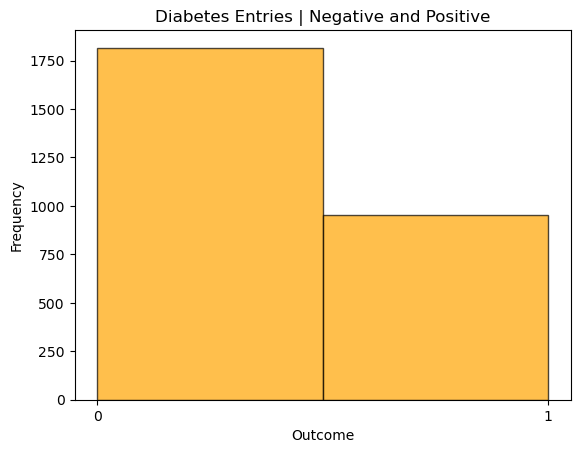

In [11]:
## Distribution of the Target Variable (which is the Outcome column in this case)

plt.hist(df['Outcome'], bins=2, color='orange', edgecolor='black', alpha=0.7)

plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Diabetes Entries | Negative and Positive' )
plt.xticks([0, 1])

Text(0.5, 1.0, 'Relationship between Glucose , Blood Pressure, and Diabetetes')

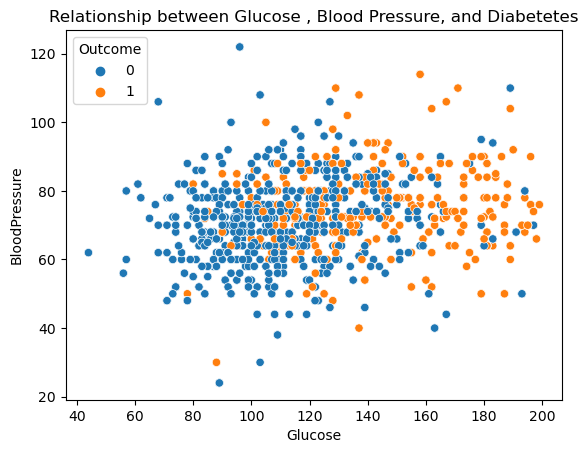

In [12]:
## Correlation Analysis, checking the relevance of high glucose and Blood Pressure levels and Diabetes

sns.scatterplot(df,x='Glucose',y='BloodPressure',hue='Outcome')
plt.title('Relationship between Glucose , Blood Pressure, and Diabetetes')

Text(0, 0.5, 'Value')

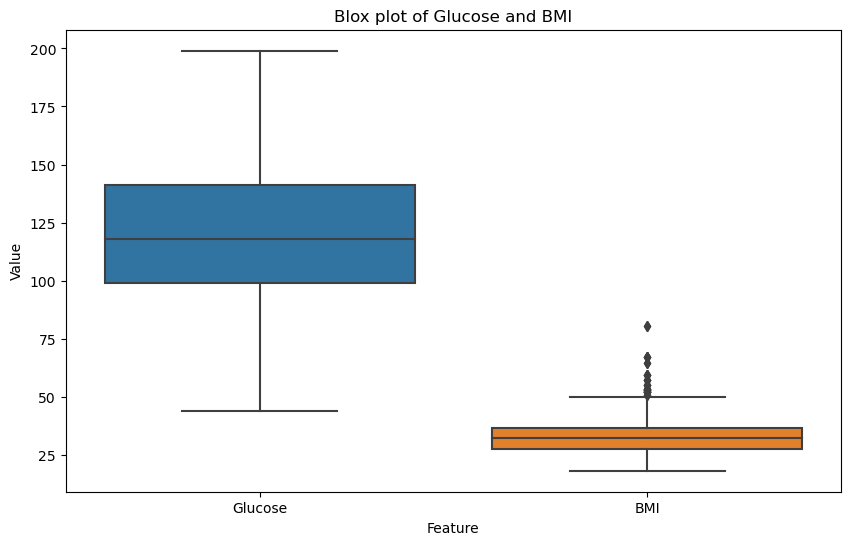

In [13]:
# Feature Distributions

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Glucose', 'BMI']])
plt.title('Blox plot of Glucose and BMI')
plt.xlabel('Feature')
plt.ylabel('Value')

## Descoveries

There are a couple of observations that can be made after looking at the dataset. One of the most important has to be the many false entries in certain columns, such as Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI. Such values had to be replaced with the mean value of that specific column. After a few tests, we can observe that there are technically no null values in our dataset and no duplicates. After creating a variety of charts, it is apparent that the majority of the entries do not have diabetes (65.6% of entries test negative for diabetes, while the remaining 34.4% has tested positive). Furthermore, entries that have high blood pressure and high glucose levels are more likely to have diabetes compared to those with lower levels.

# 3. Pre-Processing Data

In [15]:
# Data Splitting in order to train and test the data shape

feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]
target_column = 'Outcome'

X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [16]:
print('Training Data Shape', X_train.shape,y_train.shape,sep='\n')

Training Data Shape
(2214, 8)
(2214,)


In [17]:
print('Testing Data Shape',X_test.shape,y_test.shape,sep='\n')

Testing Data Shape
(554, 8)
(554,)


In [18]:
# We normalize specific columns in order to improve the model's performance

columns_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

## 3.1 Model Selection

For this particular case, the decision had to be made which algorithm would be used for the prediction model. After some time of research, the decision was between a Linear Regression (LR) and a Decision Tree (DT) algorithm. One of the reasons for the consideration of using LR was due to it being simple, it is easily interpreted, and its ability to assess the impact of each feature in order to predict a case of someone having diabetes (Madhubala, et al., 2019).

In the end, the decision was made to use a DT for various reasons. Firstly, it has been stated that the DT algorithm is able to capture the relationship between features and the target variable in a more efficient manner compared to LR (Posonia, et al., 2020). Furthermore, the DT algorithm have been proven to be more robust to outliers and is able to select the most important features of a dataset during its runtime process (Posonia, et al., 2020).

In [19]:
# Creating a Decision Tree Classifier

classifier = DTC()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
print('Accuracy:', '{:.1f}%'.format(classifier.score(X_train, y_train) * 100))

Accuracy: 100.0%


In [22]:
print('Accuracy:', '{:.3f}%'.format(classifier.score(X_test, y_test) * 100))

Accuracy: 99.819%


## Explanations

As stated previously the Decision Tree is the algorithm that was chosen for this particular case, due to its abilities being better suited for a diabetes prediction model. Furthermore, specific columns, such as, Glucose, BloodPressure, SkinThickness, Insulin were features that were chosen to be normalised, since completing such an action improves the model's performance. It can also be noted that the accuracy of the training data achieved a score of 100%, which indicates that the model works well with the data that it was presented with. Later on, the accuracy of the test data was tested which resulted in a score of 99.8% which indicates that the model performs well on data that it has not seen previously.

Confusion Matrix =  [[365   0]
 [  1 188]]


<Axes: title={'center': 'Confusion Matrix heatmap'}>

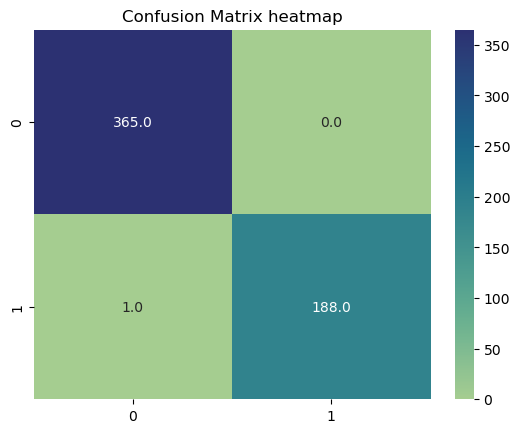

In [24]:
# Creating a Confusion Matrix (Testing the performance of the classification model)

y_prediction = classifier.predict(X_test)
matrix = confusion_matrix(y_test,y_prediction)
print('Confusion Matrix = ',matrix)
plt.title('Confusion Matrix heatmap')
sns.heatmap(matrix,annot=True, fmt=".1f",cmap='crest')

In [25]:
# Evaluation of Model Performance

y_pred = classifier.predict(X_test)
y_true = y_test

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_true, y_pred)
print("Precision:", precision)

recall = recall_score(y_true, y_pred)
print("Recall:", recall)

f1 = f1_score(y_true, y_pred)
print("F1-score:", f1)

roc_auc = roc_auc_score(y_true, y_pred)
print("ROC AUC:", roc_auc)

Accuracy: 0.9981949458483754
Precision: 1.0
Recall: 0.9947089947089947
F1-score: 0.9973474801061007
ROC AUC: 0.9973544973544973


### 3.2 Evaluation Metrics Used

After running a model performance test, these are the results that were given

- Accuracy: 0.9981949458483754 (99.8%).

The high accuracy of the model shows us that it has classified almost all of instances in the our dataset correctly.

- Precision: 1.0.

This result shows us that any instances that were found to be positive by the model, were indeed true. Meaning that most of the individuals that it predicted having diabetes, indeed had it.

- Recall: 0.9947089947089947.

This results informs us that the it has identified 99.4% of all the cases of entries having diabetes.

- F1-score: 0.9973474801061007.

The F1-score shows us how many times the model is correct when it says that one of the entries is positive for diabetes.

- ROC AUC (Receiver Operating Characteristic Area Under the Curve): 0.9973544973544973.

The high score of the ROC AUC shows us that the model used has the ability to detect cases of entries with or without diabetes, meaning that it producess a high true positive rate and a low false positive rate.


### 3.3 Performance Evaluation of the Decision Tree Algorithm

Based on the scores that were presented, the chosen algorithm demonstrates a good performance in predicting diabetes. With high accuracy (99.82%), precision (100%), recall (99.47%), F1-score (99.73%), and ROC AUC (99.74%). The model exhibits strong predictive capabilities by distinguishing between positive and negative instances. These results indicate robust discrimination ability and can pretty accurately predict whether individuals have diabetes or not.

### 3.4 Interpretation of Results

The analysis of model results reveals an adequate depiction of the algorithm's effectiveness in diabetes prediction. Producing high scores across various metrics underscores its proficiency in accurately identifying individuals at risk of diabetes. Precision and recall metrics of 100% and 99.47%, respectively, signify the model's ability to precisely identify positive cases while capturing a significant portion of true positives.

### 3.5 Limitations and Challenges

It should be mentioned that the dataset that was given, could be considered to be medium-sized, which means that it is not certain how the currently built prediction model would work on a dataset with a significant big amount of entries. Furthermore, it should be mentioned that some columns in the dataset had false entries which had to be replaced with actual data that could be analyzed and in order to overcome this challenge, any value that was equal to zero in ones of the columns previously mentioned was replaced with the mean value.

### 3.6 Future Improvements

It is possible that other algorithms would be more efficient in such a case, but due to time constraints, it is not possible to test to a greater extent. The Decision Tree algorithm seems to be working in an efficient manner with a medium-sized dataset such as the one that was used, but it is entirely possible that when faced with a significantly larger dataset, the results would more skewed and inaccurate. Furthermore a dataset with less false entries would certainly improve the model's performance and accuracy.

# 4.Conclusion

In conclusion, the evaluation of the diabetes prediction model, particularly utilizing the Decision Tree algorithm, has demonstrated promising results in accurately identifying individuals at risk of diabetes. The high accuracy, precision, recall, F1-score, and ROC AUC indicate the model's strong predictive capabilities and discrimination ability. Despite the dataset's medium size and challenges related to false entries, the model has performed well, albeit further validation on larger datasets is warranted. Moving forward, exploring alternative algorithms and addressing data quality issues could enhance the model's performance and reliability. Overall, the model shows potential as a valuable tool for early diabetes detection, with opportunities for refinement and improvement in the future.

# References

Madhubala, V., Porkodi, P., Selvapriya, R. & Tamilzhchelvi , P., 2019. Diabetics Prediction Based on Multi-Linear Regression Using R Language. Asian Journal of Computer Science and Technology , 8(2), pp. 17-19.

Posonia, A. M., Vigneshwari, S. & Rani, D. J., 2020. Machine Learning based Diabetes Prediction using Decision Tree J48. Thoothukudi, IEEE.
